# Variable Bottom Friction to Represent Sandheads Spit

In [91]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import bathy_tools
from salishsea_tools import nc_tools

%matplotlib inline

In [17]:
# import bathymetry with and without the jetty
bathy6 = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/nemo-forcing/grid/bathy_meter_SalishSea6.nc')
bathy9 = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/nemo-forcing/grid/bathy_meter_SalishSea10.nc')
depth6 = bathy6.variables['Bathymetry'][:]
depth9 = bathy9.variables['Bathymetry'][:]

(22,) (22,)
[295 296 297 298 299 300 301 302 303 304 305 306 307 307 308 308 309 309
 310 310 311 312]


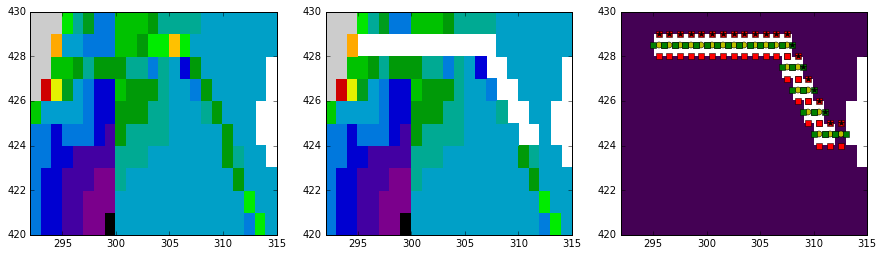

In [56]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
cmap = 'spectral'
ax[0].pcolormesh(depth6, cmap=cmap, vmax=20)
ax[1].pcolormesh(depth9, cmap=cmap, vmax=20)
ax[2].pcolormesh(depth6-depth9, cmap='viridis')
for axi in ax:
    axi.set_ylim((420, 430))
    axi.set_xlim((292, 315))
x = np.arange(295, 308)
y = np.ones(13)*428
x = np.append(x, (307, 308))
y = np.append(y, (427, 427))
x = np.append(x, (308, 309))
y = np.append(y, (426, 426))
x = np.append(x, (309, 310))
y = np.append(y, (425, 425))
x = np.append(x, (310, 311, 312))
y = np.append(y, (424, 424, 424))
print (x.shape, y.shape)
print (x)
ax[2].plot(x+0.5, y+0.5, 'oy')
ax[2].plot(x+0.5, y, 'rs')
ax[2].plot(x+0.5, y+1, 'rs')
ax[2].plot(x, y+0.5, 'gs')
ax[2].plot(x+1, y+0.5, 'gs')
ax[2].plot(x[:13]+0.5, y[:13]+1, 'k*')
ax[2].plot(x[12]+1, y[12]+0.5, 'k*')
ax[2].plot(x[14]+0.5, y[14]+1, 'k*')
ax[2].plot(x[14]+1, y[14]+0.5, 'k*')
ax[2].plot(x[16]+0.5, y[16]+1, 'k*')
ax[2].plot(x[16]+1, y[16]+0.5, 'k*')
ax[2].plot(x[18]+0.5, y[18]+1, 'k*')
ax[2].plot(x[18]+1, y[18]+0.5, 'k*')
ax[2].plot(x[20:22]+0.5, y[20:22]+1, 'k*')


(22,) (22,)
[295 296 297 298 299 300 301 302 303 304 305 306 307 307 308 308 309 309
 310 310 311 312]


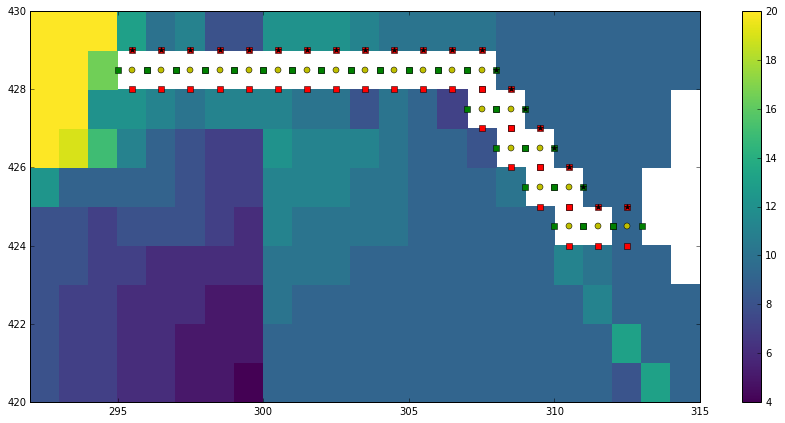

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
mesh = ax.pcolormesh(depth9, cmap='viridis', vmax=20)
ax.set_ylim((420, 430))
ax.set_xlim((292, 315))
x = np.arange(295, 308)
y = np.ones(13)*428
x = np.append(x, (307, 308))
y = np.append(y, (427, 427))
x = np.append(x, (308, 309))
y = np.append(y, (426, 426))
x = np.append(x, (309, 310))
y = np.append(y, (425, 425))
x = np.append(x, (310, 311, 312))
y = np.append(y, (424, 424, 424))
print (x.shape, y.shape)
print (x)
ax.plot(x+0.5, y+0.5, 'oy')
ax.plot(x+0.5, y, 'rs')
ax.plot(x+0.5, y+1, 'rs')
ax.plot(x, y+0.5, 'gs')
ax.plot(x+1, y+0.5, 'gs')
ax.plot(x[:13]+0.5, y[:13]+1, 'k*')
ax.plot(x[12]+1, y[12]+0.5, 'k*')
ax.plot(x[14]+0.5, y[14]+1, 'k*')
ax.plot(x[14]+1, y[14]+0.5, 'k*')
ax.plot(x[16]+0.5, y[16]+1, 'k*')
ax.plot(x[16]+1, y[16]+0.5, 'k*')
ax.plot(x[18]+0.5, y[18]+1, 'k*')
ax.plot(x[18]+1, y[18]+0.5, 'k*')
ax.plot(x[20:22]+0.5, y[20:22]+1, 'k*')
fig.colorbar(mesh)

In [65]:
dbyone = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/nemo-forcing/grid/bathy_downonegrid.nc')
mydepth = dbyone.variables['Bathymetry'][:]

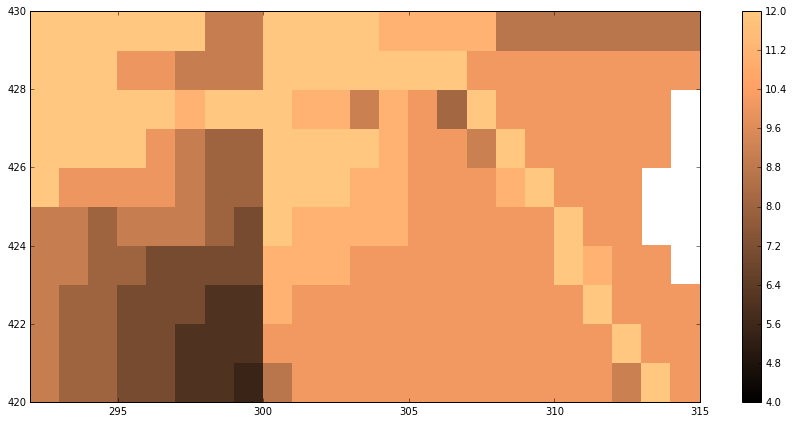

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
mesh = ax.pcolormesh(mydepth, cmap='copper', vmin=4, vmax=12)
ax.set_ylim((420, 430))
ax.set_xlim((292, 315))
fig.colorbar(mesh)

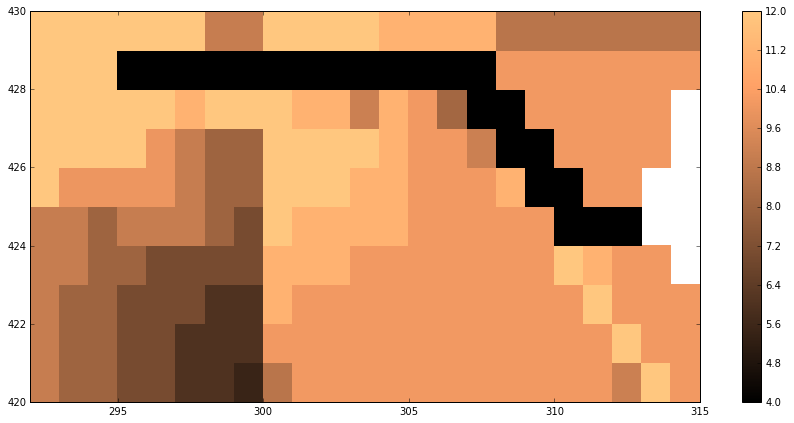

In [105]:
newdepth = np.ma.copy(mydepth)
mask_for_jetty = np.zeros_like(mydepth)
for i, j in zip(x, y):
    newdepth[j, i] = 4.0
    mask_for_jetty[j, i] = 1.0
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
mesh = ax.pcolormesh(newdepth, cmap='copper', vmin=4, vmax=12)
ax.set_ylim((420, 430))
ax.set_xlim((292, 315))
fig.colorbar(mesh)

In [85]:
# lets smooth
max_dh_over_hbar = 0.8
depthsmooth = bathy_tools.smooth(newdepth[:], max_norm_depth_diff=max_dh_over_hbar, smooth_factor=0.2)

In [88]:
print (np.max(depthsmooth-newdepth))
print (np.min(depthsmooth-newdepth))

0.0
0.0


In [93]:
ysize = depthsmooth.shape[0]; xsize = depthsmooth.shape[1]
print (ysize, xsize)

new_bathy = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/bathy_dbO_shallow_jetty.nc', 'w')
new_bathy.createDimension('y', ysize)
new_bathy.createDimension('x', xsize)
nc_tools.show_dimensions(new_bathy)

898 398
<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 898

<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 398



In [94]:
newlons = new_bathy.createVariable('nav_lon', float, ('y', 'x'), zlib=True)
newlons.setncattr('units', 'degrees_east')
newlats = new_bathy.createVariable('nav_lat', float, ('y', 'x'), zlib=True)
newlats.setncattr('units', 'degrees_north')
newdepths = new_bathy.createVariable(
    'Bathymetry', float, ('y', 'x'), 
    zlib=True, least_significant_digit=0.1, fill_value=0)
newdepths.setncattr('units', 'metres')

newlons[:] = dbyone.variables['nav_lon']
newlats[:] = dbyone.variables['nav_lat']
newdepths[:] = depthsmooth[:]

In [95]:
nc_tools.show_dataset_attrs(new_bathy)

file format: NETCDF4


In [97]:
print (dbyone.history)


[2013-10-30 13:18] Created netCDF4 zlib=True dataset.
[2013-10-30 15:22] Set depths between 0 and 4m to 4m and those >428m to 428m.
[2013-10-31 17:10] Algorithmic smoothing.
[2013-11-21 19:53] Reverted to pre-smothing dataset (repo rev 3b301b5b9b6d).
[2013-11-21 20:14] Updated dataset and variable attributes to CF-1.6 conventions & project standards.
[2013-11-21 20:47] Removed east end of Jervis Inlet and Toba Inlet region due to deficient source bathymetry data in Cascadia dataset.
[2013-11-21 21:52] Algorithmic smoothing.
[2014-01-01 14:44] Smoothed mouth of Juan de Fuca
[2015-] Jie made Fraser River
[2015-12-24 11:46] dropped by one grid thickness, smoothed to 0.8



In [99]:
new_bathy.history = """
[2013-10-30 13:18] Created netCDF4 zlib=True dataset.
[2013-10-30 15:22] Set depths between 0 and 4m to 4m and those >428m to 428m.
[2013-10-31 17:10] Algorithmic smoothing.
[2013-11-21 19:53] Reverted to pre-smothing dataset (repo rev 3b301b5b9b6d).
[2013-11-21 20:14] Updated dataset and variable attributes to CF-1.6 conventions & project standards.
[2013-11-21 20:47] Removed east end of Jervis Inlet and Toba Inlet region due to deficient source bathymetry data in Cascadia dataset.
[2013-11-21 21:52] Algorithmic smoothing.
[2014-01-01 14:44] Smoothed mouth of Juan de Fuca
[2015-] Jie made Fraser River
[2015-12-24 11:46] dropped by one grid thickness, smoothed to 0.8
[2016-05-21 13:34] shallow jetty to 4m
"""

In [100]:
new_bathy.conventions = """
CF-1.6"""

new_bathy.title= """
Salish Sea NEMO Bathymetry"""

new_bathy.institution= """ 
Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia"""

new_bathy.references= """ 
https://bitbucket.org/salishsea/nemo-forcing/src/tip/grid/bathy_dbO_shallow_jetty.nc"""

new_bathy.comment= """
Based on 1_bathymetry_seagrid_WestCoast.nc file from 2-Oct-2013 WCSD_PREP tarball provided by J-P Paquin.
"""

new_bathy.source= """ 
https://bitbucket.org/salishsea/tools/src/tip/bathymetry/SalishSeaBathy.ipynb
https://bitbucket.org/salishsea/tools/src/tip/bathymetry/SmoothMouthJdF.ipynb
https://bitbucket.org/salishsea/tools/src/tip/bathymetry/Deepen by Grid Thickness.ipynb
https://bitbucket.org/salishsea/analysis-susan/src/tip/notebooks/bathymetry/SandheadsSpit.ipynb
"""

new_bathy.close()

In [101]:
ysize = depthsmooth.shape[0]; xsize = depthsmooth.shape[1]
print (ysize, xsize)

jetty_mask = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/jetty_mask.nc', 'w')
jetty_mask.createDimension('y', ysize)
jetty_mask.createDimension('x', xsize)
nc_tools.show_dimensions(jetty_mask)

898 398
<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 898

<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 398



In [102]:
newlons = jetty_mask.createVariable('nav_lon', float, ('y', 'x'), zlib=True)
newlons.setncattr('units', 'degrees_east')
newlats = jetty_mask.createVariable('nav_lat', float, ('y', 'x'), zlib=True)
newlats.setncattr('units', 'degrees_north')
friction_mask = jetty_mask.createVariable(
    'high_friction', float, ('y', 'x'), 
    zlib=True, least_significant_digit=0.01, fill_value=0)
friction_mask.setncattr('units', 'none')

In [107]:
newlons[:] = dbyone.variables['nav_lon']
newlats[:] = dbyone.variables['nav_lat']
friction_mask[:] = mask_for_jetty[:]

In [108]:
jetty_mask.history = """
[2016-05-21 13:52] One over jetty, zero everywhere else, position from Jie's bathymetry 10
"""

jetty_mask.conventions = """
CF-1.6"""

jetty_mask.title= """
Mask to Enhance Friction over Jetties"""

jetty_mask.institution= """ 
Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia"""

jetty_mask.references= """ 
https://bitbucket.org/salishsea/nemo-forcing/src/tip/grid/jetty_mask.nc"""

jetty_mask.comment= """
One over Sandheads Jetty, zero elsewhere
"""

jetty_mask.source= """ 
https://bitbucket.org/salishsea/analysis-susan/src/tip/notebooks/bathymetry/SandheadsSpit.ipynb
"""

jetty_mask.close()